In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize

from nltk.probability import FreqDist
from nltk.corpus import stopwords

import re

## Loading the data

In [6]:
df = pd.read_csv(r"C:\Users\Maciek\Downloads\Product reviews.csv")
df.head()

C:\Users\Maciek\AppData\Local\Temp\ipykernel_16256\1516282616.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Maciek\Downloads\Product reviews.csv")


,ID,Review_ID,Item_ID,Base_item_ID,Review_date,Reviewer_ID,Real_name,Verified_purchase,Rating,Title,...,Helpful_votes_week16,Helpful_votes_week17,Helpful_votes_week18,Helpful_votes_week19,Helpful_votes_week20,Helpful_votes_week21,Helpful_votes_week22,Helpful_votes_week23,Helpful_votes_week24,Brand
0,1,R100E6MT94PK6L,B0051VVOB2,NaN,1/8/2012,A1HGATCAMGXTGF,False,True,5,Love My Kindle Fire!,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Amazon
1,2,R100HU42LKLLD0,B0057O9O6K,NaN,4/10/2012,A3GGO95QT2PP47,False,True,2,Not the best Tablet or a good buy,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Panimage
2,3,R100PBXP49AU0B,B0051VVOB2,NaN,3/26/2012,AA8JPO5R668P8,True,True,2,"Had it 3 months, would not purchase again",...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,Amazon
3,4,R100U020EZR95F,B0051VVOB2,NaN,6/14/2012,A1NDQ8WBRADEO8,True,False,5,College Grad - I use it waaaay more than my la...,...,NaN,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0,Amazon
4,5,R101ANBUYVZCUM,B004U9USEA,NaN,5/21/2011,A1M0INXF0D3R4J,False,True,5,Better than I expected.,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Samsung


## Distribution of brands

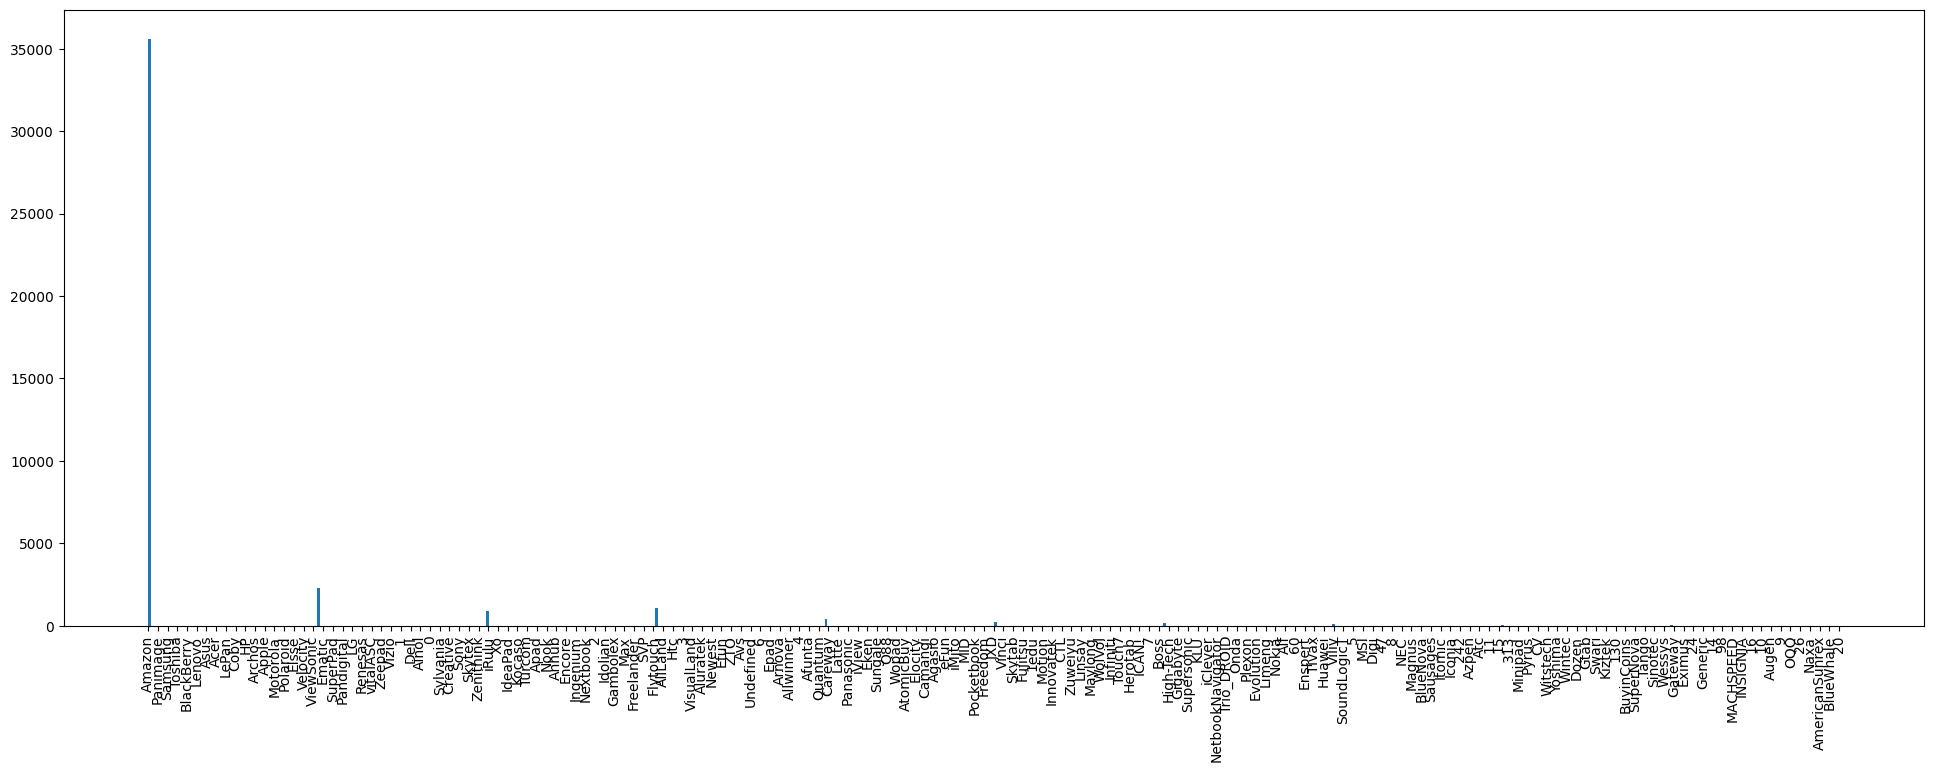

In [140]:

plt.figure(figsize=(24,8))
plt.hist(df["Brand"], width=0.3)
plt.xticks(rotation=90)

plt.show()

## This dataset is too big
We need to consider removing reviews for Amazon brand products or keeping only Amazon brand products. We will make this choice based on which approach will give us more balanced dataset.

In [141]:
df.describe()

,ID,Rating,Total_votes_week5,Total_votes_week6,Total_votes_week7,Total_votes_week8,Total_votes_week9,Total_votes_week10,Total_votes_week11,Total_votes_week12,...,Helpful_votes_week15,Helpful_votes_week16,Helpful_votes_week17,Helpful_votes_week18,Helpful_votes_week19,Helpful_votes_week20,Helpful_votes_week21,Helpful_votes_week22,Helpful_votes_week23,Helpful_votes_week24
count,40741.000000,40741.000000,30736.000000,31343.000000,31945.000000,32570.000000,33114.000000,33616.000000,34053.000000,34604.00000,...,36294.000000,36771.000000,37348.000000,37736.000000,38266.000000,38768.000000,39262.000000,39731.000000,40217.000000,40734.000000
mean,20371.000000,3.798139,8.671460,8.573142,8.512631,8.459349,8.443317,8.416201,8.397439,8.32895,...,5.437758,5.435724,5.406608,5.362863,5.337271,5.324030,5.303016,5.301679,5.277793,5.269014
std,11761.057995,1.449103,31.076854,30.534714,30.434480,30.341298,30.348471,30.348037,30.355111,29.87638,...,29.185921,29.425131,29.335664,28.634584,28.456603,28.405479,28.365157,28.574320,28.308278,28.479218
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10186.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,20371.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,30556.000000,5.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,40741.000000,5.000000,968.000000,961.000000,965.000000,973.000000,978.000000,988.000000,994.000000,961.00000,...,990.000000,995.000000,995.000000,989.000000,989.000000,990.000000,992.000000,993.000000,995.000000,998.000000


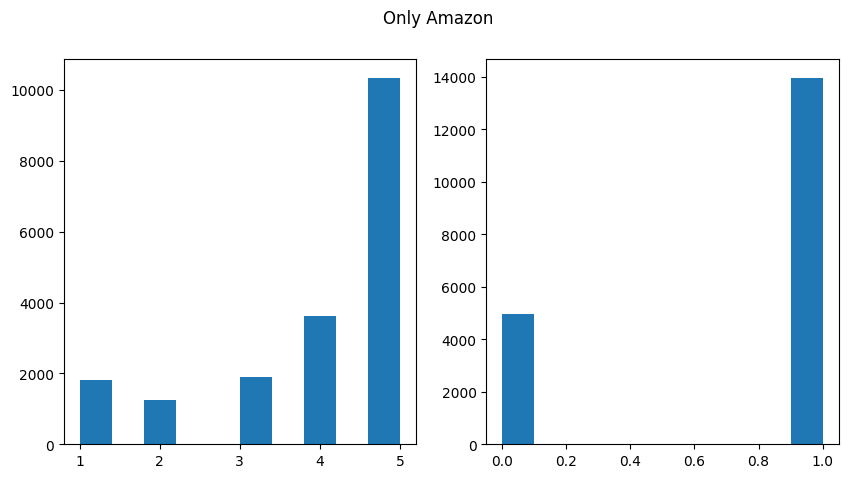

Imbalance ratio for only amazon: 282:100


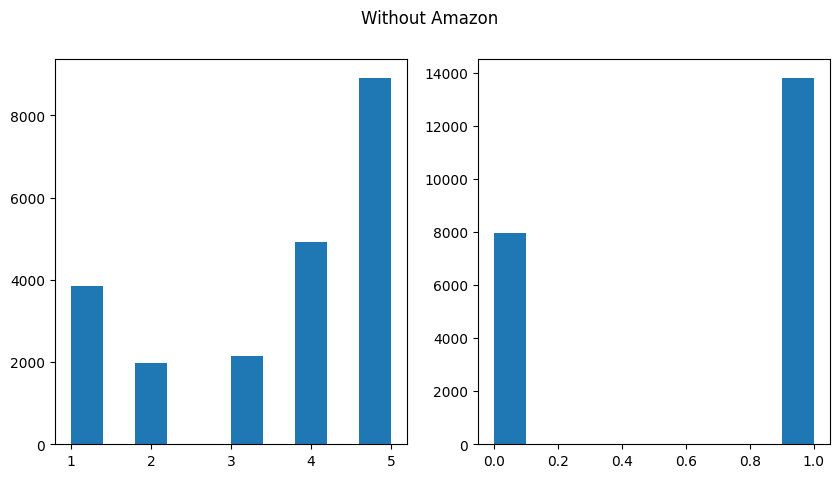

Imbalance ratio without amazon: 173:100


In [7]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].hist(df[df["Brand"]=="Amazon"]["Rating"])
target = (df[df["Brand"]=="Amazon"]["Rating"]>3).astype(int)
ax[1].hist(target)
plt.suptitle("Only Amazon")
plt.show()
print(f'Imbalance ratio for only amazon: {int(np.sum(target)/np.sum(1-target)*100)}:100')

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].hist(df[df["Brand"]!="Amazon"]["Rating"])
target = (df[df["Brand"]!="Amazon"]["Rating"]>3).astype(int)
ax[1].hist(target)
plt.suptitle("Without Amazon")
plt.show()
print(f'Imbalance ratio without amazon: {int(np.sum(target)/np.sum(1-target)*100)}:100')

## We will remove revies of products with Amazon brand

In [8]:
df_final = df[df["Brand"]!="Amazon"].iloc[:,8:-49]
df_final["target"] = (df_final["Rating"]>3).astype(int)
df_final.head()

,Rating,Title,Content,target
1,2,Not the best Tablet or a good buy,The operating system is is an early android. Y...,0
4,5,Better than I expected.,I got the Galaxy Tab because I wanted a comput...,1
5,1,Pick a different computer,This was the computer recommended to my entire...,0
6,4,Great for travel and general use,"I registered my Thrive 16GB on August 19, 2011...",1
7,5,Highly Underestimated Tablet,What a great tablet. Let me break it down and ...,1


## Analysis of input text

### Are there reviews with longer title than content?

In [9]:
df_final[df_final["Title"].apply(len)>=df_final["Content"].apply(len)].head()

,Rating,Title,Content,target
184,5,MY KINDLE FIRE,Love it,1
528,5,Hardware - simple,Inside WOW!,1
1135,5,Kindle Fire,I LOVE IT!,1
1184,4,"Great Machine, One of the best iPad alternatives",I owed a few Tablets (Lenovo IdeaPad K1,1
1648,4,All the reviews were right...,Err:510,1


### It seems there are some mistakes in the dataset- saome reviews lack content
We have to remove them

In [10]:
one_word_reviews = df_final[df_final["Content"].apply(lambda x:len(x.split()))<2]
one_word_reviews

,Rating,Title,Content,target
1648,4,All the reviews were right...,Err:510,1
3296,3,Best bang for the buck,Err:510,0
12059,2,Can't Use Skype?,Unbelievable,0
12074,5,Sweeet device..,-),1
12241,2,2 Steps Forward - 3 Steps Back,#NAME?,0
20898,1,Do not buy this if you want a usable tablet! P...,#NAME?,0
21701,3,Has not lived up to product description,buggy,0
24884,5,JUST AMAZING!! Makes Apple Fanboys Take a seco...,),1
25192,5,Enjoying playing with Fire!,),1
26380,5,one word,incredible,1


In [11]:
df_final.loc[one_word_reviews.index, "Content"] = one_word_reviews["Content"].apply(lambda x:x.strip() if x.strip() in ["Unbelievable", "incredible"] else " ")
df_final[df_final["Content"].apply(lambda x:len(x.split()))<2]

,Rating,Title,Content,target
1648,4,All the reviews were right...,,1
3296,3,Best bang for the buck,,0
12059,2,Can't Use Skype?,Unbelievable,0
12074,5,Sweeet device..,,1
12241,2,2 Steps Forward - 3 Steps Back,,0
20898,1,Do not buy this if you want a usable tablet! P...,,0
21701,3,Has not lived up to product description,,0
24884,5,JUST AMAZING!! Makes Apple Fanboys Take a seco...,,1
25192,5,Enjoying playing with Fire!,,1
26380,5,one word,incredible,1


### We also note that review titles often carrry meaningful information
We will combine them separated with a white space

In [12]:
df_final["text"] = df_final["Title"]+" "+df_final["Content"]
df_final.head()

,Rating,Title,Content,target,text
1,2,Not the best Tablet or a good buy,The operating system is is an early android. Y...,0,Not the best Tablet or a good buy The operatin...
4,5,Better than I expected.,I got the Galaxy Tab because I wanted a comput...,1,Better than I expected. I got the Galaxy Tab b...
5,1,Pick a different computer,This was the computer recommended to my entire...,0,Pick a different computer This was the compute...
6,4,Great for travel and general use,"I registered my Thrive 16GB on August 19, 2011...",1,Great for travel and general use I registered ...
7,5,Highly Underestimated Tablet,What a great tablet. Let me break it down and ...,1,Highly Underestimated Tablet What a great tabl...


## EDA

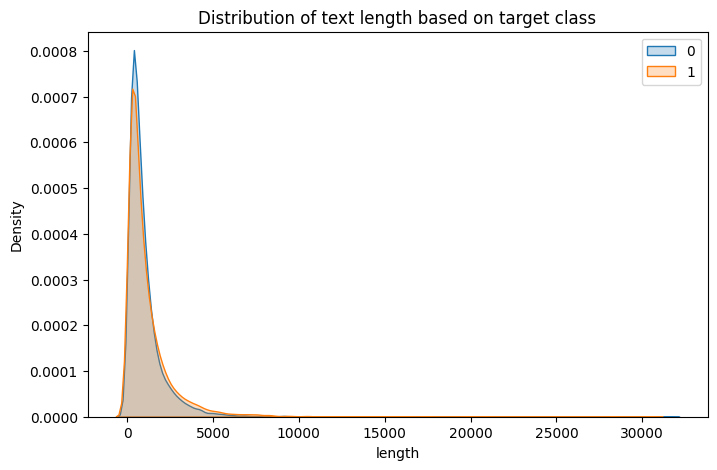

In [149]:
# Method provides tokenization then removes special symbols like ; , . ' "
def tokenize_words_only(text):
    return [word for word in word_tokenize(text) if word not in [",",".", "?", "!", "...", ";", ":", "'", '"', "(", ")", "[", "]", "<", ">", "{", "}", "/", "|", '``', "-", "_"]]


df_final["# of words"] = df_final.text.apply(lambda x: len(tokenize_words_only(x)))
df_final["length"] = df_final.text.apply(lambda x: len(x))

label, count = np.unique(df_final.target, return_counts=True)

plt.figure(figsize =(8,5))
for l in label:
    sns.kdeplot(df_final.length[df_final.target==l], fill=True, label=l)
plt.legend()
plt.title("Distribution of text length based on target class")
plt.show()

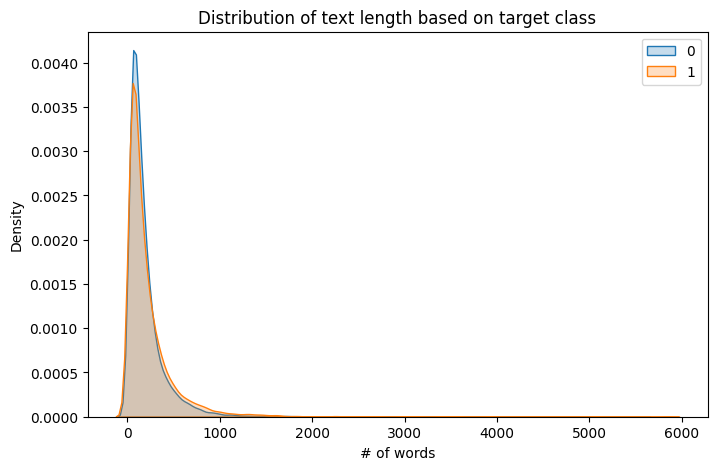

In [152]:
plt.figure(figsize =(8,5))
for l in label:
    sns.kdeplot(df_final["# of words"][df_final.target==l], fill=True, label=l)
plt.legend()
plt.title("Distribution of text length based on target class")
plt.show()

# Most common words

In [153]:
fq = FreqDist(word.lower() for word in tokenize_words_only(" ".join(df_final.text)))
res = sorted([ [key,value] for key, value in dict(fq).items() if key not in stopwords.words('english')], key=lambda item: item[1])
res = pd.DataFrame(res[::-1])
res.columns = ["word", "count"]
res.head(20)

,word,count
0,tablet,39516
1,n't,30059
2,'s,23017
3,screen,18484
4,ipad,17563
5,use,16123
6,android,15948
7,great,15700
8,one,15571
9,like,14506


# Check for remains of HTML
Some NLP datasets are created by scraping the data from websides. This sometimes results in remains of HTML code (like < br > < /br >) left in the final dataset


In [17]:
texts = ["" for _ in range(len(df_final))]
for i, text in enumerate(df_final.text):
    html = re.findall('<[^<]+?>',  text)
    if len(html)>0:
        print(html)
        for x in html:
            text.replace(x, "")
    texts[i] = text
df_final.text = texts

['<1.>', '<2.>', '<3.>', '<4.>']
['<- ->']
['<waits>', '<frowns>']
['<...>']
['<Step One>', '<Step Two>']
['<rooCASE Super Bubble Neoprene Sleeve Case Cover Compatible with Amazon Kindle Fire 7-Inch Tablet / Amazon Kindle Touch 3G / Amazon Kindle 3>']
['<...>']
['< [...]>', '< [...]>']
['<10:00 p.m>']
['<find>', '<only>']
['<...>']
['< * PRICE IS RIGHT - at $189.99 + tax, I got my money\'s worth * LOUD SPEAKER - Great for Music, streaming radio, podcast, or Netflix movies * 8" PERFECT FOR READING - 7" is too small and 10.1" is too bulky for reading in bed * REMOTE TV CONTROL - this tablet has build-in IR to control your TV, Cable Box, VCR, and DVD * GOOD BUILD QUALITY - no flex, no creeps, a very solid construction * GOOD VIEWING ANGLE - with good contrast * GOOD BATTERY LIFE * SKYPE VIDEO WORKS - many cheap tablet like Arnova, Viewsonic have webcams but is incompatible with skype video. I\'m happy to report that Skype Video Chat works 100% on this Vizio. Yeah!!!! * Honeycomb 3.2 OS - 

Doesn't look like HTML its quite messy, but we can keep it

## Making datasets for training

In [19]:
df_final.to_csv(r"C:\Users\Maciek\Documents\Studia\Magisterka\Amazon\cleared_data.csv")